In [37]:
import geopandas as gpd

gdf_loc = gpd.GeoDataFrame.from_file("./gadm41_PHL.gpkg", layer=1)
# gdf_loc = gdf_loc.to_crs(gdf_landcover.crs)
# gdf_landcover = gdf_landcover.to_crs(gdf_loc.crs)

In [38]:
gdf_loc.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [39]:
gdf_loc["NAME_1"].unique()

array(['Abra', 'Agusan del Norte', 'Agusan del Sur', 'Aklan', 'Albay',
       'Antique', 'Apayao', 'Aurora', 'Basilan', 'Bataan', 'Batanes',
       'Batangas', 'Benguet', 'Biliran', 'Bohol', 'Bukidnon', 'Bulacan',
       'Cagayan', 'Camarines Norte', 'Camarines Sur', 'Camiguin', 'Capiz',
       'Catanduanes', 'Cavite', 'Cebu', 'Compostela Valley',
       'Davao del Norte', 'Davao del Sur', 'Davao Oriental',
       'Dinagat Islands', 'Eastern Samar', 'Guimaras', 'Ifugao',
       'Ilocos Norte', 'Ilocos Sur', 'Iloilo', 'Isabela', 'Kalinga',
       'La Union', 'Laguna', 'Lanao del Norte', 'Lanao del Sur', 'Leyte',
       'Maguindanao', 'Marinduque', 'Masbate', 'Metropolitan Manila',
       'Misamis Occidental', 'Misamis Oriental', 'Mountain Province',
       'Negros Occidental', 'Negros Oriental', 'North Cotabato',
       'Northern Samar', 'Nueva Ecija', 'Nueva Vizcaya',
       'Occidental Mindoro', 'Oriental Mindoro', 'Palawan', 'Pampanga',
       'Pangasinan', 'Quezon', 'Quirino', 'Riza

In [40]:
# gdf_loc[gdf_loc["NAME_2"]=="Quezon City"]

In [41]:
import pandas as pd

# Filter for Quezon City
qc = gdf_loc.copy()

# Make sure CRS is WGS84 (lat/lon)
qc = qc.to_crs("EPSG:4326")

# Compute centroid for each geometry
qc["centroid"] = qc.geometry.centroid

# Extract longitude and latitude from the centroid
qc["Longitude"] = qc["centroid"].x
qc["Latitude"] = qc["centroid"].y

# Create final DataFrame
result = qc[["NAME_1", "Longitude", "Latitude"]].rename(columns={"NAME_1": "Area"})

# Save to CSV
result.to_csv("philippine_centroids.csv", index=False)

print(result.head())


               Area   Longitude   Latitude
0              Abra  120.805536  17.579238
1  Agusan del Norte  125.522899   9.014507
2    Agusan del Sur  125.757300   8.403420
3             Aklan  122.247556  11.609858
4             Albay  123.615464  13.211274


C:\Users\nealb\AppData\Local\Temp\ipykernel_28528\292691907.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  qc["centroid"] = qc.geometry.centroid


In [42]:
result.shape

(81, 3)

C:\Users\nealb\AppData\Local\Temp\ipykernel_28528\1721580865.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  qc["centroid"] = qc.geometry.centroid
C:\Users\nealb\AppData\Local\Temp\ipykernel_28528\1721580865.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  qc.centroid.plot(ax=ax, color="red", markersize=50, label="Centroid")


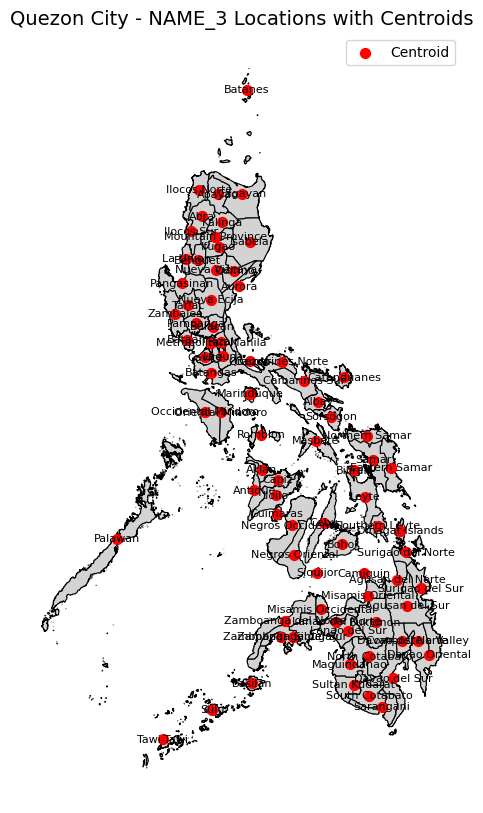

In [43]:
import matplotlib.pyplot as plt

# Filter for Quezon City
qc = gdf_loc.copy()

# Compute centroids
qc["centroid"] = qc.geometry.centroid

# Create plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the boundaries of NAME_3 locations
qc.plot(ax=ax, color="lightgray", edgecolor="black", linewidth=0.8)

# Plot the centroids
qc.centroid.plot(ax=ax, color="red", markersize=50, label="Centroid")

# Add labels at centroid positions
for idx, row in qc.iterrows():
    plt.text(row.centroid.x, row.centroid.y, row["NAME_1"],
             fontsize=8, ha="center", va="center")

# Formatting
plt.title("Quezon City - NAME_3 Locations with Centroids", fontsize=14)
plt.legend()
plt.axis("off")

plt.show()
